# Assignment 2: Data Preprocessing, Parameter Tuning, Model Evaluation Using SVM and K-NN

## What you will learn

* Data preprocessing
* Parameter Tuning
* Model evaluation
* Employing SVM and K-NN methods on the data

## Setup

* Download [Anaconda Python 3.6](https://www.anaconda.com/download/) for consistent environment.
* Download Pandas library.
* If you use pip environment then make sure your code is compatible with versions of libraries provided within Anaconda's Python 3.6 distribution.

## Submission
* Do not change any variable/function names.
* Just add your own code and don't change existing code
* Save this file and rename it to be **studentid_lastname.ipynb** (student id (underscore) last name.ipynb) where your student id is all numbers.
* Export your .ipynb file to PDF (File > Download as > PDF via Latex). **Please don't leave this step for final minutes**.
* Submit both the notebook and PDF files (**NO ZIP, RAR,..**).
* If you happen to use any external library not included in Anaconda (mention in **Submission Notes** section below)

In [14]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
import itertools
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# remove the following statements if you like to see warnings
import warnings
warnings.filterwarnings('ignore')

## Submission Notes
(Please write any notes here that you think I should know during marking)

# [NO MARKS]  Warming Up
Various interesting machine learning datasets can be found at:
- https://archive.ics.uci.edu/ml/index.php

For this task, we have chosen the Heart Disease dataset, available at:
- https://archive.ics.uci.edu/ml/datasets/heart+Disease

**Data Set Information**

- The dataset contains **303 subjects** with **76 attributes**. 
- All the published experiments refer to using a subset of **14 of attributes**. 
- The **goal** field in the dataset refers to **the presence of heart disease** in the patient. 
- It is integer valued from 0 (no presence) to 4 (highest presence). 

**Note:** Since the class number 4 is very sparse (just 13 subjects). We have dropped the subjects belonging to class 4 from the data.

Experiments with the Cleveland dataset have concentrated on---attempting to distinguish **the presence** (values 1, 2, 3, 4) from **the absence** (value 0).

**Attribute Information**

14 attributes are been used: 

1. #3 (age) 
2. #4 (sex) 
3. #9 (cp) 
4. #10 (trestbps) 
5. #12 (chol) 
6. #16 (fbs) 
7. #19 (restecg) 
8. #32 (thalach) 
9. #38 (exang) 
10. #40 (oldpeak) 
11. #41 (slope) 
12. #44 (ca) 
13. #51 (thal) 
14. #58 (num) (the predicted attribute)


### (no marks) Reading the data


In [15]:
# Reading the data-set
df = pd.read_csv('./processed_cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
                       'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'prediction']
print('Data-set shape: ',df.shape)

df.tail(n=10)

Data-set shape:  (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,prediction
293,63.0,1.0,4.0,140.0,187.0,0.0,2.0,144.0,1.0,4.0,1.0,2.0,7.0,2
294,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1
295,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0
296,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,3
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0



### (no marks) Removing the missing data
There are many missing data marked by '?' in the dataset. We will use *dropping* as the most straight-forward technique for removing such data-points.

In [16]:
# Removing all subjects from class 4
df = df.loc[df.prediction != 4]

# Replacing the missing data '?' with NAN values
df.replace('?', np.nan, inplace=True) 
df = df.dropna()
df = df.astype(float)


### (no marks) Splitting the data


In [17]:
# Separating the data and the labels
X = np.asarray(df[df.columns[:-1]]).astype(np.float32)
y = np.asarray(df.prediction)

# Splitting the data into the train and the test sets
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
sss.get_n_splits(X, y)

train_index, test_index = next(sss.split(X, y))
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]
    
print('Training data: \n',X_train)
print('\n')
print('Training labels: \n',y_train)

Training data: 
 [[45.  0.  4. ...  2.  0.  3.]
 [41.  1.  2. ...  2.  0.  6.]
 [42.  1.  4. ...  1.  0.  3.]
 ...
 [67.  1.  4. ...  2.  2.  7.]
 [65.  1.  4. ...  2.  1.  7.]
 [62.  0.  4. ...  1.  0.  3.]]


Training labels: 
 [0. 0. 0. 1. 0. 3. 0. 0. 0. 1. 1. 3. 0. 1. 1. 0. 2. 3. 0. 1. 3. 3. 0. 0.
 0. 2. 0. 0. 3. 0. 0. 0. 3. 1. 2. 0. 0. 3. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 3. 1. 2. 0. 2. 2. 0. 0. 0. 0. 1. 3. 1. 0. 2. 0. 0. 0. 0. 1. 0. 0. 0.
 3. 0. 0. 0. 1. 0. 0. 0. 3. 1. 0. 0. 1. 1. 1. 0. 0. 3. 0. 0. 0. 2. 2. 0.
 0. 0. 0. 0. 0. 3. 0. 2. 2. 2. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 2.
 2. 0. 0. 1. 0. 0. 0. 1. 3. 0. 0. 0. 0. 0. 0. 2. 2. 1. 2. 0. 1. 0. 2. 0.
 3. 1. 0. 0. 0. 3. 0. 0. 0. 2. 2. 0. 2. 1. 0. 0. 0. 3. 3. 0. 0. 0. 0. 1.
 0. 1. 3. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 3. 0. 1. 0. 0. 3. 0. 2. 3. 0. 0.
 0. 0. 2. 0. 1. 1. 0. 0. 3. 0. 2. 1. 0. 2. 2. 0. 0. 0. 1. 0. 0. 0. 3. 1.
 2. 0. 3. 0. 0. 3. 0. 3. 1. 2. 0.]


## [10 marks] Data Exploration

a) (3 marks) Use `pandas` to find the ratio of the presence of disease versus the absence within the different `sex`.

**Note:** `0` is female and `1` is male.

In [18]:
# we have defined a new column which is `true` if there is a presence of disease (i.e., prediction is [1, 2, 3])
df['has_disease'] = df.apply(lambda x: x.prediction in [1, 2, 3], axis=1)

# use groupby and aggregation
aggr = {'ratio' : lambda x: sum(x) / (len(x) - sum(x))}
display(df.groupby('sex')['has_disease'].agg(aggr))

,ratio
sex,
0.0,0.323944
1.0,1.134831


b) (7 marks) Do the same thing for age. Split the age groups as follows (left included, right isn't):

1. [29, 49)
2. [49, 69)
3. [69, inf)

And then find the average ratio of prevalence of the heart disease within the each group.

In [19]:
# write your code here
ranges = [28,48,68,np.inf]
display(df.groupby(pd.cut(df.age, ranges))['has_disease'].agg(aggr))

,ratio
age,
"(28.0, 48.0]",0.385965
"(48.0, 68.0]",1.042105
"(68.0, inf]",0.375000


### (no marks) Utility function

In [20]:
# Do not change the function
# This function is adapted from the sklearn website
# This function let you draw a confusion matrix for your problem

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[1 2]
 [3 4]]


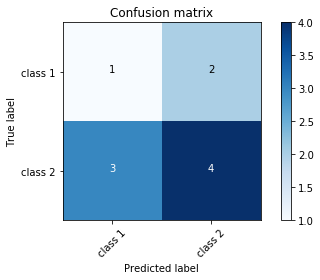

In [21]:
# usage
plot_confusion_matrix(np.array([[1, 2], [3, 4]]), ['class 1', 'class 2'])

# Task 1 [20 marks]

### a) [10 marks] Applying KNN to the data

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90        32
         1.0       0.30      0.27      0.29        11
         2.0       0.50      0.14      0.22         7
         3.0       0.38      0.43      0.40         7

   micro avg       0.67      0.67      0.67        57
   macro avg       0.50      0.45      0.45        57
weighted avg       0.64      0.67      0.64        57

Confusion matrix, without normalization
[[31  1  0  0]
 [ 5  3  0  3]
 [ 1  3  1  2]
 [ 0  3  1  3]]


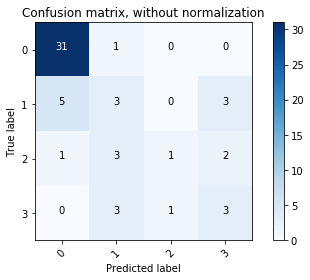

In [22]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.preprocessing import MinMaxScaler

# Task 2
# Add your code in the following part:

# We use min max scaler to normalize the features between [0, 1] 
scaler = MinMaxScaler()

# Add your code here instead of ...
scaler.fit(X_train)

# Create a knn classifier instance here (If you don't add anything here, your code won't execute!)
knn_clf = KNeighborsClassifier()

# Fit the classifier using the train data (If you don't add anything here, your code won't execute!)
knn_clf.fit(scaler.transform(X_train), y_train)

# Predict the test class labels using the trained classifier (If you don't add anything here, your code won't execute!)
y_pred = knn_clf.predict(scaler.transform(X_test))

# (If you don't add anything here, your code won't execute!) 
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3],
                      title='Confusion matrix, without normalization')

### b) [5 marks] Between $K=3$ and $k=5$ which one gives more  accuracy ?

In [23]:
from sklearn.metrics import accuracy_score

# write your code here and populate `y_pred_k5` and `y_pred_k3`
# knn_clf defaults to 5 neighbors
knn_clf.n_neighbors = 5
y_pred_k5 = knn_clf.predict(scaler.transform(X_test))

knn_clf.n_neighbors = 3
y_pred_k3 = knn_clf.predict(scaler.transform(X_test))

print(accuracy_score(y_test, y_pred_k5), accuracy_score(y_test, y_pred_k3))

0.6666666666666666 0.5964912280701754


### c) [5 marks] Between $\ell_1$, $\ell_2$, and $cosine$ similarity which one is better in term of accuracy?

In [24]:
# write your code here to experiment with different distance metrics
# use argument `metric` to change to a different distance by default it is euclidean distance

metrics = {
    'l1': 'manhattan',
    'l2': 'minkowski',
    'cos': 'cosine'
}

for k, v in metrics.items():
    clf = KNeighborsClassifier(metric=v)
    clf.fit(scaler.transform(X_train), y_train)
    y_pred = clf.predict(scaler.transform(X_test))
    
    print(k, ': ' , accuracy_score(y_test, y_pred))


l1 :  0.6491228070175439
l2 :  0.6666666666666666
cos :  0.6666666666666666


# Task 2 [10 marks]

### Understanding the pipelining architecture of `Sklearn`

In the code above, you had to call `scaler` for every prediction by a model. This can be avoided by using a `pipeline` mechanism within sklearn. Look at the code below:

1. We create a data scaler (can be any sclaer with fit and transform functions).
2. We create SVC object (again with fit anf transform functions).
3. Then we create a pipeline: `data --> scaler --> svc --> fit`.
4. The same transformation is also applied during the prediction phase.

We further use a `GridSearchCV` for the SVC's parameters tuning.

In [25]:
# Task 2

# Creating a SVM classifier instance
svc = SVC()

# Add a scaler here (If you don't add anything here, your code won't execute!)
data_scaler = StandardScaler()

# Update the pipeline by adding the scaler from the previous line
model = make_pipeline(data_scaler, svc)
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)
%time grid.fit(X_train, y_train)
print( grid.best_estimator_)

Wall time: 189 ms
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])


In [26]:
# Selecting the best estimator after the parameter search
model = grid.best_estimator_

In [27]:
# Predicting the test labels
y_pred = model.predict(X_test)

In [28]:
# Printing the classification report
print(classification_report(y_pred=y_pred,y_true=y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.97      0.86        32
         1.0       0.43      0.27      0.33        11
         2.0       0.33      0.29      0.31         7
         3.0       0.25      0.14      0.18         7

   micro avg       0.65      0.65      0.65        57
   macro avg       0.45      0.42      0.42        57
weighted avg       0.59      0.65      0.61        57



Confusion matrix, without normalization
[[31  0  1  0]
 [ 7  3  1  0]
 [ 1  1  2  3]
 [ 1  3  2  1]]


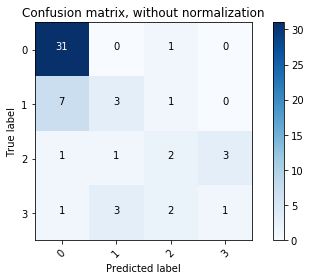

In [29]:
# Computing the confusion matrix for the test data
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using the previous function
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3],
                      title='Confusion matrix, without normalization')

# Task 3 [40 marks]

### How to handle the missing data

More information can be found here:
(https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)

a) [6 scores] Name two numeric methods for dealing with the missing data (except dropping):
    
    Write the answer here:
    
    1- Interpolation
    
    2- Filling missing values with mean: fillna 
    

b) [12 scores] Apply the methods that you mentioned in part (a) to the `df_with_missing_data` dataframe:

In [30]:
# Task 3 part (b)
# Add your code here (If you don't add anything here, your code won't execute!)

df_with_missing_data = pd.read_csv('./processed_cleveland.csv', header=None)
df_with_missing_data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
                                'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'prediction']

# Replace string value ? with Null
df_with_missing_data.replace('?', np.nan, inplace=True)
# Removing class 4
df_with_missing_data = df_with_missing_data.loc[df_with_missing_data.prediction != 4]
# Set all cells to float64 type
df_with_missing_data = df_with_missing_data.astype(np.float64)

df_1 = df_with_missing_data.interpolate()

df_2 = df_with_missing_data.fillna(df_with_missing_data.mean())


c) [22 scores] Apply the steps described in *Task 2* on `df_1` and `df_2` and show the results using `classification_report` and `plot_confusion_matrix`.



Classification Report For Data Filled By Interpolation
Wall time: 166 ms
              precision    recall  f1-score   support

         0.0       0.82      0.94      0.87        33
         1.0       0.17      0.18      0.17        11
         2.0       0.25      0.14      0.18         7
         3.0       0.25      0.14      0.18         7

   micro avg       0.60      0.60      0.60        58
   macro avg       0.37      0.35      0.35        58
weighted avg       0.56      0.60      0.57        58

Confusion matrix, without normalization
[[31  2  0  0]
 [ 6  2  1  2]
 [ 1  4  1  1]
 [ 0  4  2  1]]


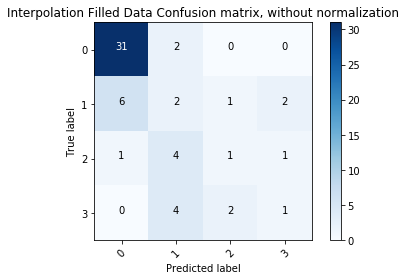



Classification Report For Data Filled By Mean
Wall time: 160 ms
              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86        33
         1.0       0.23      0.27      0.25        11
         2.0       0.25      0.14      0.18         7
         3.0       0.00      0.00      0.00         7

   micro avg       0.60      0.60      0.60        58
   macro avg       0.32      0.34      0.32        58
weighted avg       0.53      0.60      0.56        58

Confusion matrix, without normalization
[[31  2  0  0]
 [ 6  3  1  1]
 [ 2  3  1  1]
 [ 0  5  2  0]]


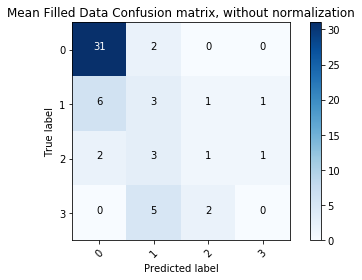

In [31]:
# Task 3 part (c)
# Add your code here
def init_grid():
    # Creating a SVM classifier instance
    svc = SVC()

    # Add a scaler here (If you don't add anything here, your code won't execute!)
    data_scaler = StandardScaler()

    # Update the pipeline by adding the scaler from the previous line
    model = make_pipeline(data_scaler, svc)
    param_grid = {'svc__C': [1, 5, 10, 50],
                  'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

    return GridSearchCV(model, param_grid)

def split_data(df):
    # Separating the data and the labels
    X = np.asarray(df[df.columns[:-1]]).astype(np.float64)
    y = np.asarray(df.prediction)

    # Splitting the data into the train and the test sets
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
    sss.get_n_splits(X, y)

    train_index, test_index = next(sss.split(X, y))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    return X_train, X_test, y_train, y_test

def get_prediction(data):
    X_train, X_test, y_train, y_test = data
    
    %time grid.fit(X_train, y_train)
    grid.best_estimator_
    model = grid.best_estimator_
    y_pred = model.predict(X_test)
    return y_pred, y_test

grid = init_grid()
method = ('Interpolation', 'Mean')

# Process the 2 data set and display results as instructed
for i, df in enumerate((df_1, df_2)):
    print('\n')
    print('Classification Report For Data Filled By ' + method[i])
    y_p, y_t = get_prediction(split_data(df))
    print(classification_report(y_pred=y_p,y_true=y_t))
    
    # Computing the confusion matrix for the test data
    cnf_matrix = confusion_matrix(y_t, y_p)

    # Plotting the confusion matrix using the previous function
    plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3],
                          title= method[i] + ' Filled Data Confusion matrix, without normalization')
    
    # Ensures the plotted image displays during runtime
    plt.show()

# Task 4 [20 marks]

### Model Evaluation

For the given confusion matrix, answer the following questions.

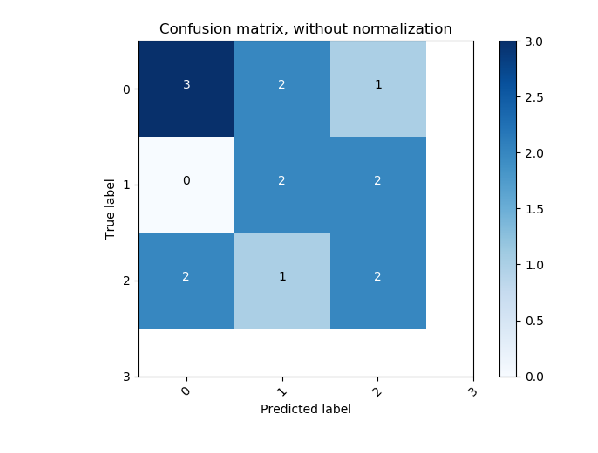

In [32]:
I = plt.imread('foo.png')
fig = plt.figure(figsize= (10,10))
plt.imshow(I)
plt.axis('off')
plt.show()

#### Calculate the following parameters (Use macro-average definition)
You can find all these definitions on https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html 
 and https://en.wikipedia.org/wiki/Confusion_matrix
 
 Write your answer in front of each parameter:

1- [2 scores] total number of instances = 3+2+1+0+2+2+2+1+2 = 15

2- [2 scores] number of classes = 3

3- [2 scores] True positive (TP) = (3+2+2)/3=~ 2.33

4- [2 scores] True negative (TN) = (7+8+7)/3=~ 7.33 

5- [2 scores] False positive (FP) = (2+3+3)/3=~ 2.67

6- [2 scores] False negative (FN) = (3+2+3)/3=~ 2.67

7- [2 scores] Sensitivity, recall, hit rate, or true positive rate (TPR) = (0.5+0.5+0.4)/3=~ 0.47

8- [2 scores] Specificity, selectivity or true negative rate (TNR) = (0.78+0.73+0.70)/3=~ 0.74

9- [4 scores] F1-Score = (0.55+0.44+0.40)/3=~ 0.46

In [33]:
# Assignment end